# Import data


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import RocCurveDisplay,classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_driven/data/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [123]:
def read_file(path):
  df = pd.read_csv(path, sep=";")
  return df

def Encoder(df):
    le = LabelEncoder()
    df = pd.get_dummies(df, columns = ['job','marital', 'education','default', 'loan', 'housing'])
    df['contact'] = df['contact'].map({'telephone': 1, 'cellular': 0})
    df['poutcome'] = df['poutcome'].map({'success': 1, 'nonexistent': 0, 'failure':0})
    df['y'] = df['y'].map({'yes':1, 'no':0})
    return df 

def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age']=4
    return df

def duration(df):
    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5
    return df

def week_month(df):
    d_week = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
    d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
    df.month = df.month.map(d_mons)
    df.day_of_week = df.day_of_week.map(d_week)
    return df

def clean(df):
    df.dropna(inplace=True)
    df = df.drop(columns=['emp.var.rate','cons.price.idx', 'nr.employed', 'month', 'day_of_week'])
    df = df.drop_duplicates()
    return df

def train_test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  return X_train, X_test, y_train, y_test

def logitic(X_train, y_train):
  logit = LogisticRegression(random_state=42)
  logit.fit(X_train, y_train)
  return logit

def detree(X_train, y_train):
  dtre = DecisionTreeClassifier(random_state=42)
  dtre.fit(X_train, y_train)
  return dtre

def hyperparam_tuning_dt(X_train, y_train):
    params = {'max_depth': np.arange(1, 10)}
    model = DecisionTreeClassifier()
    dtree = GridSearchCV(DecisionTreeClassifier(),  param_grid=params)
    dtree.fit(X_train, y_train)
    #best_md1 = md1.best_estimator_
    return dtree

def hyperparam_tuning_logit(X_train, y_train):
  logit = LogisticRegression(random_state=42)
  logit.fit(X_train, y_train)
  #best_md2 = md2.best_estimator_
  return logit


def plot_auc(logit, dtree, X_test, y_test):
  # logistic
  pres = logit.predict_proba(X_test)
  pred = pres[:,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, pred)
  auc_logit = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, label="Logistic, AUC={:.5f}".format(auc_logit))
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title('ROC Curve Analysis Test', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()

  # DecisionTree
  pres1 = dtree.predict_proba(X_test)
  pred1 = pres1[:,1]
  fpr1, tpr1, _ = metrics.roc_curve(y_test, pred1)
  roc_dtree = metrics.auc(fpr1, tpr1)
  plt.plot(fpr1, tpr1, label="DecisionTree, AUC={:.5f}".format(roc_dtree))
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title('ROC Curve Analysis Test', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  plt.show()


  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic
recall_score: 0.38660907127429806
f1_score: 0.4988388295401765
precision_score: 0.7028795811518325


DecisionTree
recall_score: 0.5147588192944564
f1_score: 0.5610043154178109
precision_score: 0.6163793103448276


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC train


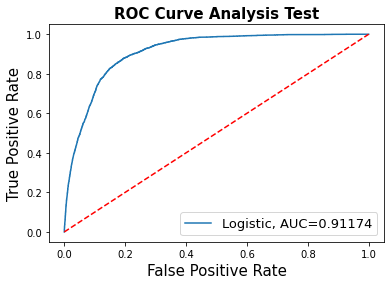

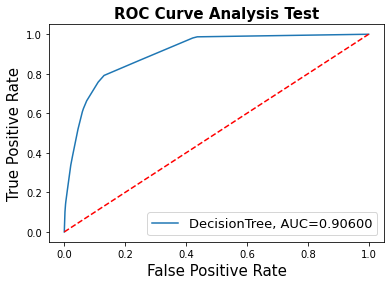


 AUC test


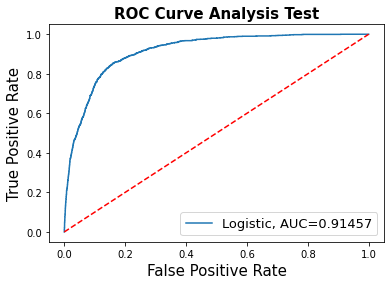

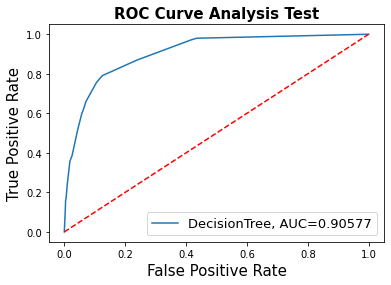

In [124]:
def main():
  df = read_file("/content/drive/MyDrive/Data_driven/data/bank-additional-full.csv")
  df = Encoder(df)
  df = age(df)
  df = duration(df)
  df = week_month(df)
  df = clean(df)

  X = df.loc[:, df.columns != 'y']
  y = df.loc[:, df.columns == 'y']

  X_train, X_test, y_train, y_test = train_test(X,y)
  params = {'max_depth': np.arange(1, 10)}
  model = DecisionTreeClassifier()
  dtree = GridSearchCV(DecisionTreeClassifier(),  param_grid=params)
  dtree.fit(X_train, y_train)

  logit = LogisticRegression(random_state=42)
  logit.fit(X_train, y_train)
  
  pred_lo = logit.predict(X_test)
  pred_dt = dtree.predict(X_test)
  


  print('Logistic')
  print('recall_score:', metrics.recall_score(y_test, pred_lo))
  print('f1_score:', metrics.f1_score(y_test, pred_lo))
  print('precision_score:', metrics.precision_score(y_test, pred_lo))
  print("\n")
  print('DecisionTree')
  print('recall_score:', metrics.recall_score(y_test, pred_dt))
  print('f1_score:', metrics.f1_score(y_test, pred_dt))
  print('precision_score:', metrics.precision_score(y_test, pred_dt))

  hyperparam_tuning_dt(X_train, y_train)
  hyperparam_tuning_logit(X_train, y_train)

  print('AUC train')
  plot_auc(logit, dtree, X_train, y_train)
  print("\n AUC test")
  plot_auc(logit, dtree, X_test, y_test)

  


if __name__ == '__main__':
  main()